In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('AMZN1.csv')
df2 = pd.read_csv("GOOGL.csv")


In [5]:
df1

,Date,Open,High,Low,Close,Volume
0,07/12/2023,130.31,131.26,128.83,130.80,"54,022,848"
1,07/11/2023,127.75,129.77,127.35,128.78,"49,951,461"
2,07/10/2023,129.07,129.28,125.92,127.13,"61,889,289"
3,07/07/2023,128.59,130.97,128.13,129.78,"41,992,246"
4,07/06/2023,128.25,128.73,127.37,128.36,"40,697,848"
...,...,...,...,...,...,...
247,07/18/2022,115.00,117.24,113.15,113.76,"59,115,422"
248,07/15/2022,112.50,115.59,111.59,113.55,"84,317,820"
249,07/14/2022,110.24,111.18,107.58,110.63,"51,163,141"
250,07/13/2022,107.03,111.78,106.01,110.40,"61,353,809"


In [6]:
df2

,Date,Open,High,Low,Close,Volume
0,07/12/2023,118.80,120.33,118.41,118.93,"30,404,410"
1,07/11/2023,116.29,117.71,115.35,117.14,"23,078,779"
2,07/10/2023,118.30,118.31,116.14,116.45,"35,315,238"
3,07/07/2023,120.10,121.05,119.40,119.48,"21,709,551"
4,07/06/2023,119.80,120.30,118.40,120.11,"24,778,801"
...,...,...,...,...,...,...
247,07/18/2022,112.64,113.68,108.37,109.03,"43,164,594"
248,07/15/2022,112.00,113.14,110.90,111.78,"46,769,119"
249,07/14/2022,110.21,111.09,108.37,110.37,"37,003,039"
250,07/13/2022,111.70,114.20,111.20,111.35,"43,722,019"


In [7]:
x = df1['Close']
y = df2['Close']


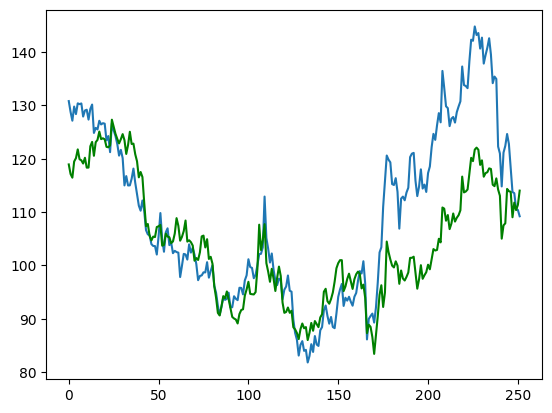

In [8]:
plt.plot(x)
plt.plot(y,'g')

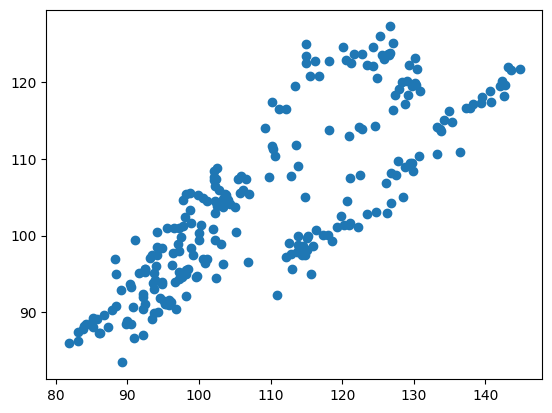

In [9]:
plt.scatter(x,y)

In [10]:
x_with_intercept = sm.add_constant(x)
regression_result = sm.OLS(y,x_with_intercept).fit()
hedge_ratio = regression_result.params[1]
hedge_ratio

0.5695215549897386

In [11]:
adf_test = sm.tsa.stattools.adfuller(y,maxlag=1)
adf_t_stats=adf_test[0]
adf_crit=adf_test[4]

In [12]:
adf_t_stats


-1.8053162401892693

In [13]:
adf_crit

{'1%': -3.4566744514553016,
 '5%': -2.8731248767783426,
 '10%': -2.5729436702592023}

In [14]:
#Set the input for the johanson test
j = np.column_stack((y,x))
#run the test
jr = statsmodels.tsa.vector_ar.vecm.coint_johansen(j,det_order=0,k_ar_diff=1)

j

array([[118.93, 130.8 ],
       [117.14, 128.78],
       [116.45, 127.13],
       [119.48, 129.78],
       [120.11, 128.36],
       [121.75, 130.38],
       [119.9 , 130.22],
       [119.7 , 130.36],
       [119.1 , 127.9 ],
       [120.18, 129.04],
       [118.33, 129.18],
       [118.34, 127.33],
       [122.34, 129.33],
       [123.15, 130.15],
       [120.55, 124.83],
       [123.1 , 125.78],
       [123.53, 125.49],
       [125.09, 127.11],
       [123.67, 126.42],
       [123.83, 126.66],
       [123.64, 126.57],
       [122.23, 123.43],
       [122.14, 124.25],
       [122.5 , 121.23],
       [127.31, 126.61],
       [126.01, 125.3 ],
       [124.67, 124.25],
       [123.72, 122.77],
       [122.87, 120.58],
       [123.67, 121.66],
       [124.61, 120.11],
       [123.48, 115.  ],
       [120.9 , 116.75],
       [122.56, 114.99],
       [125.05, 115.01],
       [122.76, 116.25],
       [122.83, 118.15],
       [120.84, 115.5 ],
       [119.51, 113.4 ],
       [116.51, 111.2 ],


In [15]:
j_ei = jr.eig
j_evec = jr.evec

j_ei


array([0.03288351, 0.01616044])

In [16]:
print("Johansen MLE estimates")
print("NULL:\t\t\tTrace Statistic\tCrit 90%\tCrit 95%\tCrit 99%")
print(f"r <= 0\tvariable 1\t{jr.lr1[0]}\t\t{jr.cvt[0, 0]}\t\t{jr.cvt[0, 1]}\t\t{jr.cvt[0, 2]}")
print(f"r <= 1\tvariable 2\t{jr.lr1[1]}\t\t{jr.cvt[1, 0]}\t\t{jr.cvt[1, 1]}\t\t{jr.cvt[1, 2]}\n")
print("NULL:\t\t\tEigen Statistic\tCrit 90%\tCrit 95%\tCrit 99%")
print(f"r <= 0\tvariable 1\t{jr.lr2[0]}\t\t{jr.cvm[0, 0]}\t\t{jr.cvm[0, 1]}\t\t{jr.cvm[0, 2]}")
print(f"r <= 1\tvariable 2\t{jr.lr2[1]}\t\t{jr.cvm[1, 0]}\t\t{jr.cvm[1, 1]}\t\t{jr.cvm[1, 2]}\n")

Johansen MLE estimates
NULL:			Trace Statistic	Crit 90%	Crit 95%	Crit 99%
r <= 0	variable 1	12.432193299221607		13.4294		15.4943		19.9349
r <= 1	variable 2	4.073111301333703		2.7055		3.8415		6.6349

NULL:			Eigen Statistic	Crit 90%	Crit 95%	Crit 99%
r <= 0	variable 1	8.359081997887904		12.2971		14.2639		18.52
r <= 1	variable 2	4.073111301333703		2.7055		3.8415		6.6349



In [17]:
port=np.sum(np.multiply(np.tile(j_evec[:,0],(j.shape[0],1)),j),axis=1)
port

array([ 8.8578444 ,  8.72821868,  8.74091348,  9.01566194,  9.21453112,
        9.32112107,  9.0485196 ,  9.00773718,  9.09250439,  9.17637911,
        8.88220322,  9.01678123,  9.48723892,  9.55266198,  9.53596178,
        9.85925085,  9.946142  , 10.06921211,  9.90076133,  9.90807328,
        9.88536697,  9.89464305,  9.82185149, 10.09431989, 10.44609887,
       10.34066386, 10.21038814, 10.17092877, 10.19788604, 10.24307555,
       10.4989009 , 10.69284915, 10.1707831 , 10.55228224, 10.93323772,
       10.49238402, 10.36649602, 10.25146223, 10.19823272,  9.89572978,
       10.11690144,  9.83446763,  9.23736192,  8.81838167,  8.93969448,
        8.61406204,  8.59829734,  8.7340392 ,  8.72165603,  9.12399632,
        8.90098621,  8.6251117 ,  8.37732052,  8.57213513,  8.63593764,
        8.49600137,  8.70410422,  8.4984013 ,  8.69137378,  8.88548183,
        9.34738043,  9.13414767,  9.03433277,  8.99306691,  8.99865198,
        9.31063476,  8.77306432,  8.60650023,  8.6619631 ,  8.50

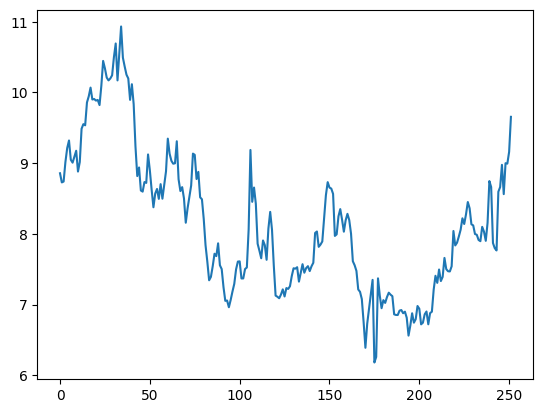

In [18]:
plt.plot(port)

In [19]:
lag = np.roll(port,1)
lag_diff= port-lag
lag_diff[0]=np.nan
lag[0]=np.nan
regress = sm.OLS(lag_diff[1:],sm.add_constant(lag[1:])).fit()
half_life = -np.log(2)/regress.params[1]
half_life

23.228510616866846

In [20]:
lookback=round(half_life)
mvavg=pd.Series(port).rolling(window=lookback).mean().values
mvstd=pd.Series(port).rolling(window=lookback).std().values
units_to_invest=-(port-mvavg)/mvstd
# Ensure numUnits is a column vector
units_to_invest = units_to_invest.reshape(-1, 1)

# Repeat numUnits along the rows to match the shape of y3
positions_amount_to_inest_in_each_asset= units_to_invest * np.tile(j_evec[:, 0].T, (j.shape[0], 1)) * j
pnl = np.sum(np.roll(positions_amount_to_inest_in_each_asset, 1, axis=0) * (np.roll(j, -1, axis=0) - np.roll(j, 1, axis=0)) / np.roll(j, 1, axis=0), axis=1)
ret = pnl / np.sum(np.abs(np.roll(positions_amount_to_inest_in_each_asset, 1, axis=0)), axis=1)
ret[np.isnan(ret)] = 0
ret

array([ 3.65667798e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.25419739e-02,
       -8.94795050e-03,  8.22542698e-03,  5.98448982e-03,  4.45212339e-04,
       -2.59251512e-03, -1.09297603e-02, -1.62130982e-02,  1.18137360e-02,
        5.16159282e-03, -2.82779398e-02,  2.21098164e-03,  2.06274901e-02,
        8.85332931e-03,  6.14998524e-03,  1.32420898e-02, -3.06812084e-03,
       -2.36628678e-03, -3.38602947e-02, -3.91264868e-02, -1.18659098e-02,
       -8.45922041e-03, -1.41299917e-02,  5.03870995e-03,  5.23670099e-03,
        1.64942755e-02,  7.59014706e-03, -2.09599559e-02, -2.17579311e-02,
       -2.16935142e-03,  

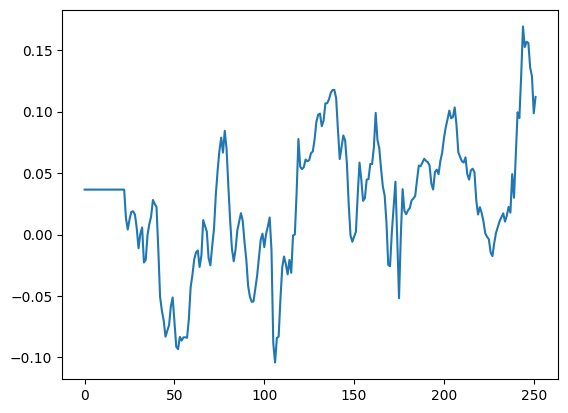

In [21]:
# Plot cumulative compounded return
plt.plot(np.cumprod(1 + ret) - 1)
plt.show()


In [22]:
# Calculate APR and Sharpe ratio
APR = (np.prod(1 + ret) ** (252 / len(ret))) - 1
Sharpe = np.sqrt(252) * np.mean(ret) / np.std(ret)
print(f"APR={APR} Sharpe={Sharpe}")

APR=0.11198538021360394 Sharpe=0.5471883726160192


In [23]:
#BollingerBands

lookback = 20
hedge_Ratio = np.full((len(x),),np.nan)


In [24]:
for t in range(lookback - 1, hedge_Ratio.shape[0]):
    X = np.column_stack((x[t-lookback+1:t+1], np.ones(lookback)))
    model = sm.OLS(y[t-lookback+1:t+1], X)
    regression_result = model.fit()
    hedge_Ratio[t] = regression_result.params[0]
hedge_Ratio

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, -0.42991804,
       -0.45138267, -0.36035831, -0.37493527, -0.28028095, -0.29050503,
       -0.35997874, -0.35390877, -0.29301181, -0.18467374, -0.12952423,
       -0.03634617,  0.03628549,  0.13425117,  0.16025834,  0.11978756,
        0.13402223,  0.14446116,  0.16409585,  0.22407462,  0.3327644 ,
        0.40338734,  0.47211173,  0.61701142,  0.76483313,  0.86996375,
        1.00227871,  1.12960805,  1.22263406,  1.28298309,  1.31589004,
        1.37476044,  1.35287786,  1.41343821,  1.3812432 ,  1.32508053,
        1.30526648,  1.32487323,  1.31429282,  1.18904856,  1.05527645,
        0.77786269,  0.39544112,  0.16061013,  0.13337172,  0.09335062,
        0.06708714,  0.09546603,  0.09086273,  0.10175084,  0.11

In [25]:
y2 = np.column_stack((x, y))

In [26]:
yport = np.sum((-hedge_Ratio[:, np.newaxis] * np.ones((y2.shape[0], 1))) * y2, axis=1)
yport

array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,  107.69016951,
        112.94045815,   88.52562332,   92.38030071,   68.31287569,
         73.76503734,   90.46625607,   88.09497049,   72.22447995,
         44.9588215 ,   31.77618021,    8.89463465,   -8.65336276,
        -31.90479118,  -38.06936953,  -28.75620135,  -32.03265337,
        -34.81224915,  -38.78241386,  -52.18921953,  -75.77378043,
        -91.87953425, -107.99555929, -136.9395152 , -163.65134547,
       -185.82425737, -211.7113328 , -235.73790398, -255.60387557,
       -268.07931652, -275.34999019, -292.53527458, -294.12917555,
       -294.97041906, -285.11622067, -281.15558725, -277.19944179,
       -277.03099242, -274.00376735, -245.89524195, -220.24674

In [27]:
hedge_Ratio = hedge_Ratio[lookback:]
yport = yport[lookback:]
y2 = y2[lookback:, :]



In [28]:
entryZscore = 1
exitZscore = 0

MA = pd.Series(yport).rolling(lookback).mean()
MSTD = pd.Series(yport).rolling(lookback).std()
zScore = (yport - MA) / MSTD

longsEntry = zScore < -entryZscore
longsExit = zScore > -exitZscore

shortsEntry = zScore > entryZscore
shortsExit = zScore < exitZscore

zScore

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
227    1.327214
228    1.337263
229    1.315605
230    1.300172
231    1.303735
Length: 232, dtype: float64

In [29]:
numUnitsLong = np.full((len(yport),), np.nan)
numUnitsShort = np.full((len(yport),), np.nan)

numUnitsLong[0] = 0
numUnitsLong[longsEntry] = 1
numUnitsLong[longsExit] = 0
numUnitsLong = pd.Series(numUnitsLong).fillna(method='ffill').values

numUnitsShort[0] = 0
numUnitsShort[shortsEntry] = -1
numUnitsShort[shortsExit] = 0
numUnitsShort = pd.Series(numUnitsShort).fillna(method='ffill').values

numUnits = numUnitsLong + numUnitsShort

numUnits

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0., -1., -1., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0., -1., -1., -1

In [30]:
positions = np.column_stack((numUnits, -hedge_Ratio, np.ones(len(numUnits))))
positions = positions[:, :2] * y2
pnl = np.sum(np.roll(positions, 1, axis=0) * (np.roll(y2, -1, axis=0) - np.roll(y2, 1, axis=0)) / np.roll(y2, 1, axis=0), axis=1)

pnl

array([-1.62000128e+01, -6.77074007e-01,  9.72967447e-02,  1.93841534e+00,
        9.83786131e-01, -7.66933280e-01, -8.24351305e-01, -6.37035782e-01,
       -1.46505903e-02,  3.21332304e-01, -2.46096044e-02, -1.34844290e-01,
        3.33826473e-02, -5.57142366e-01, -3.20516687e-02,  2.65928380e-01,
        2.57322683e-01,  4.79611035e-01,  7.10535043e-01,  4.48149238e-01,
        9.60034136e-01,  2.25351107e+00, -1.20712981e+00, -1.90429454e+00,
        4.01402977e-01,  8.49488355e-01, -1.84963541e+00, -1.08165307e+00,
       -3.78851496e+00, -7.71625840e-01,  7.25680289e+00,  4.52038041e+00,
       -2.19023680e+00, -1.96437034e+00,  2.23526061e+00, -1.49894524e+00,
       -1.05452223e+00, -4.63350148e-01, -3.91258415e+00, -4.98614220e+00,
       -1.54070362e+00,  7.97035916e+00,  3.30251753e+00, -4.62909823e+00,
       -2.54945119e+00,  1.25390071e+00, -1.64177757e+00, -1.29949874e+00,
        7.49954105e-01,  7.63075410e-01,  3.31665208e+00,  4.74123655e+00,
        2.08585805e+00, -

In [31]:
ret = pnl / np.sum(np.abs(np.roll(positions, 1, axis=0)), axis=1)
ret[np.isnan(ret)] = 0
ret

array([-0.11837167, -0.012132  ,  0.00220895,  0.04232848,  0.02865306,
       -0.02073678, -0.01817316, -0.01443812, -0.00040414,  0.01416131,
       -0.00153635, -0.02977289,  0.0074506 , -0.03432589, -0.00163185,
        0.0177529 ,  0.01564027,  0.02702923,  0.03583251,  0.016735  ,
        0.00640149,  0.0142933 , -0.00721907, -0.01063014,  0.00212692,
        0.00425625, -0.00874654, -0.00486664, -0.01629274, -0.00323189,
        0.02984946,  0.01786593, -0.00857651, -0.00780852,  0.00908598,
       -0.00607774, -0.00431213, -0.00190439, -0.01621978, -0.02200847,
       -0.01377748,  0.04257764,  0.0227945 , -0.04038076, -0.02236935,
        0.01118493, -0.01501622, -0.01169947,  0.00660955,  0.00675116,
        0.02870225,  0.04104194,  0.01862152, -0.01768517, -0.01328004,
        0.00044269, -0.0128043 ,  0.0128318 ,  0.03145254,  0.00889152,
        0.00065257, -0.01685104, -0.00458636, -0.00561827, -0.00792666,
       -0.00533466, -0.00238346, -0.00585643,  0.00769569,  0.01

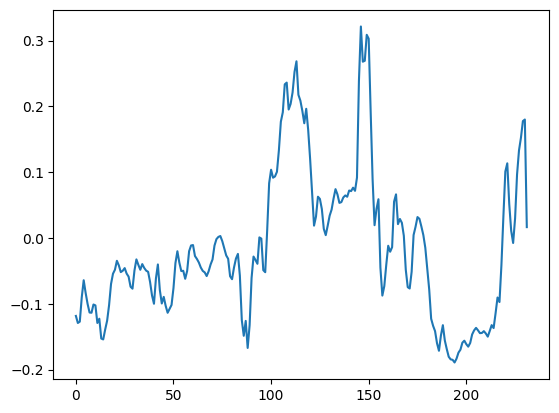

In [32]:
cumulative_ret = np.cumprod(1 + ret) - 1
plt.plot(cumulative_ret)
plt.show()

In [33]:
APR = np.prod(1 + ret) ** (252 / len(ret)) - 1
Sharpe = np.sqrt(252) * np.mean(ret) / np.std(ret)
print(f"APR={APR} Sharpe={Sharpe}")


APR=0.018049885904089624 Sharpe=0.2845639393655025


In [52]:
#bog
topN=10
zScore=1
lookback=20
x_cl = df1['Close']
x_lo = df1['Low']
x_op = df1['Open']
x_day = df1['Date']

type(x_op)

pandas.core.series.Series

In [35]:
stdret90=x_cl.pct_change(90).shift(1).rolling(20).std()
stdret90

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
247    0.154933
248    0.157024
249    0.152524
250    0.150606
251    0.148443
Name: Close, Length: 252, dtype: float64

In [54]:
buyprice= x_lo.shift(1)*(1-zScore*stdret90)
buyprice.dtype

dtype('float64')

In [71]:
returngap=(x_op-x_lo.shift(1))/x_lo.shift(1)

returngap[2].isna()

AttributeError: 'numpy.float64' object has no attribute 'isna'

In [56]:
pnl = pd.Series(np.zeros(len(x_day)),index=x_day)

pnl

Date
07/12/2023    0.0
07/11/2023    0.0
07/10/2023    0.0
07/07/2023    0.0
07/06/2023    0.0
             ... 
07/18/2022    0.0
07/15/2022    0.0
07/14/2022    0.0
07/13/2022    0.0
07/12/2022    0.0
Length: 252, dtype: float64

In [57]:
positionTable = pd.DataFrame(0, index=x_day, columns=x_cl)


positionTable

Close,130.80,128.78,127.13,129.78,128.36,130.38,130.22,130.36,127.90,129.04,...,121.14,122.42,124.63,122.77,118.21,113.76,113.55,110.63,110.40,109.22
Date,,,,,,,,,,,,,,,,,,,,,
07/12/2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07/11/2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07/10/2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07/07/2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07/06/2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
07/18/2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07/15/2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07/14/2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
ma = x_cl.shift(1).rolling(lookback).mean()
type(ma)

pandas.core.series.Series

In [81]:
for t in range(1, len(x_day)):
    if returngap.notna():
        hasData = (returngap.iloc[t] & (x_op.iloc[t] < buyprice.iloc[t]) & (x_op.iloc[t] > ma.iloc[t]))
    else:
        pass
    sorted_stocks = returngap.iloc[t, hasData].sort_values(ascending=True)
    selected_stocks = sorted_stocks.index[:min(topN, len(sorted_stocks))]
    positionTable.loc[t, selected_stocks] = 1

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

: 